In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [81]:
startTime = time.time()
test2 = [[j+i for i in range(1000)] for j in range(5000)]
test2 = np.matrix(test2)
print time.time() - startTime

0.836495161057


In [9]:
np.arange(0,10,5).resize(0)


In [100]:
couner = 0
startTime = time.time()
test = np.zeros([5000,1000],dtype="int")
for i in  np.nditer(test,order='F',op_flags=['writeonly']):
    i[...] = couner
    couner +=1
print couner
print (time.time()-startTime)

5000000
2.04154920578


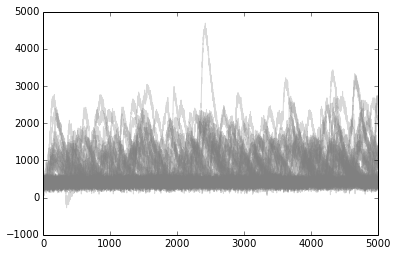

In [2]:
#code used for creation of set1 of simulated data

def alphaKernel (t, A,t_A,t_B):
    return np.float64(A*(np.exp(-t/t_A)-np.exp(-t/t_B)))

xMatrix = np.ndarray(shape=(5000,40),dtype='float32')
apList = []
for i in np.nditer(xMatrix,order='F',flags=['external_loop'],op_flags=['writeonly']):
    localAPlist = []
    xtest = np.repeat(400,5000.)
    xnoise = 80. * np.random.normal(size = xtest.size)
    xtest = xtest +xnoise
    apNumber = int(np.random.normal(loc=4,scale = 2)*3)
    
    for j in range(apNumber):
        xdata = np.arange(0,int(400*np.random.normal(loc=1,scale=0.3)),1.)
        y = (alphaKernel(xdata,np.random.normal(loc=5,scale=0.3) * 400,
                        30* np.random.normal(loc=4,scale=1),10*np.random.normal(loc=4,scale=1)))
        APposition = int(np.random.sample(size=1)* 5000)
        localAPlist.append(APposition)
        APend = APposition + y.size 
        if(APend > xtest.size):
            y.resize(xtest.size-APposition)
        xtest[APposition:APend] = xtest[APposition:APend] + y
        if (APend < 4999 and xtest[APend] - xtest[APend+1] > 80 ):
            corrector = np.arange(xtest[APend] - xtest[APend+1],0,-10)
            if(APend+ corrector.size > xtest.size):
                corrector.resize(xtest.size-APend)
            xtest[APend:APend+corrector.size] = xtest[APend:APend+corrector.size] + corrector
    i[...] = xtest
    plt.plot(xtest,'grey',alpha=0.3)
    apList.append(sorted(localAPlist))
plt.show()
np.savetxt('/home/maximilian/unistuff/paris_ens/cal_neuroim/simdata/set1',xMatrix,delimiter=',',fmt='%4.6f')

df = pd.DataFrame(apList)
df.to_csv('/home/maximilian/unistuff/paris_ens/cal_neuroim/simdata/apTimings.csv')

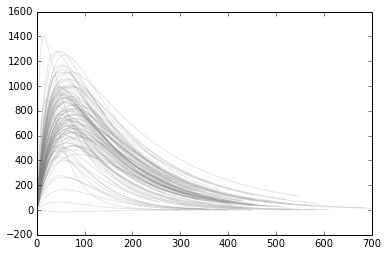

In [25]:
for i in range(100):
    xdata = np.arange(0,int(400*np.random.normal(loc=1,scale=0.3)),1.)
    y = (alphaKernel(xdata,400*np.random.normal(loc=5,scale=0.3),
                        30* np.random.normal(loc=4,scale=1),10*np.random.normal(loc=4,scale=1)))
    plt.plot(y,'grey',alpha=0.2)
plt.show()
